In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt

In [3]:
tn = gpd.read_file('../data/TN/tl_2015_47_tract.shp')
credentials = service_account.Credentials.from_service_account_file(
    'C:/Users/pfbab/NSS/googlekey/solar-roof-capstone-787ff1e58b5f.json',
)

In [4]:
client = bigquery.Client(credentials=credentials)

In [5]:
query = """SELECT * 
    FROM `bigquery-public-data.sunroof_solar.solar_potential_by_censustract` 
    WHERE state_name = 'Tennessee'
    """

In [6]:
query_job = client.query(query)

In [7]:
tnroof = query_job.to_dataframe()

In [8]:
tnroof

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,47073050700,Tennessee,36.532211,36.363400,-82.610168,-82.933983,36.446362,-82.762489,1041.25,2,...,8.530174e+03,2.043275e+04,0.000000e+00,2.526478e+03,2526.477661,3.148940e+04,"[[0,1],[25,1]]",24.045846,0,POINT(-82.7624893188477 36.446361541748)
1,47031980100,Tennessee,35.448120,35.343739,-86.005219,-86.159851,35.391674,-86.067848,1032.75,3,...,0.000000e+00,0.000000e+00,1.162019e+03,1.056148e+04,3597.633301,1.172350e+04,"[[0,3]]",8.952267,0,POINT(-86.0678482055664 35.391674041748)
2,47187051100,Tennessee,35.874828,35.696449,-86.610909,-86.873047,35.778309,-86.749619,1029.35,8,...,3.645907e+04,4.432446e+04,4.088778e+04,1.159793e+03,4918.298389,1.314785e+05,"[[0,4],[5,1],[15,1],[20,1],[45,1]]",100.399204,0,POINT(-86.7496185302734 35.7783088684082)
3,47157001100,Tennessee,35.175812,35.160938,-89.933434,-89.953201,35.167404,-89.941101,1054.85,630,...,1.939470e+06,1.490706e+06,8.283687e+05,2.945745e+06,5813.361670,7.322225e+06,"[[0,317],[5,210],[10,54],[15,18],[20,1],[25,2]...",5591.376756,1,POINT(-89.9411010742188 35.1674041748047)
4,47157001200,Tennessee,35.162498,35.149120,-89.927254,-89.944511,35.155727,-89.935753,1054.85,722,...,2.003621e+06,1.217512e+06,1.577554e+06,5.242027e+06,5949.209973,1.024544e+07,"[[0,335],[5,249],[10,71],[15,18],[20,5],[25,9]...",7823.597262,0,POINT(-89.9357528686523 35.1557273864746)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,47037980100,Tennessee,36.144421,36.091782,-86.652893,-86.700348,36.122272,-86.678108,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51197.269727,NaN,"[[0,35],[5,26],[10,11],[15,11],[20,13],[25,5],...",0.000000,0,POINT(-86.678108215332 36.1222724914551)
1026,47157980100,Tennessee,35.082142,35.020840,-89.931320,-89.991493,35.053398,-89.971237,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,90546.955359,NaN,"[[0,21],[5,22],[10,30],[15,17],[20,16],[25,14]...",0.000000,0,POINT(-89.9712371826172 35.0533981323242)
1027,47165021205,Tennessee,36.328949,36.285042,-86.558388,-86.615150,36.310520,-86.597069,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21253.637402,NaN,"[[0,52],[5,151],[10,272],[15,318],[20,271],[25...",0.000000,0,POINT(-86.5970687866211 36.3105201721191)
1028,47037015900,Tennessee,36.151211,36.117691,-86.723000,-86.758034,36.136097,-86.741096,NaN,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24478.109082,NaN,"[[0,126],[5,165],[10,77],[15,44],[20,25],[25,1...",0.000000,0,POINT(-86.741096496582 36.1360969543457)


In [9]:
tnroof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           1030 non-null   object 
 1   state_name                            1030 non-null   object 
 2   lat_max                               1030 non-null   float64
 3   lat_min                               1030 non-null   float64
 4   lng_max                               1030 non-null   float64
 5   lng_min                               1030 non-null   float64
 6   lat_avg                               1030 non-null   float64
 7   lng_avg                               1030 non-null   float64
 8   yearly_sunlight_kwh_kw_threshold_avg  950 non-null    float64
 9   count_qualified                       1030 non-null   int64  
 10  percent_covered                       1030 non-null   float64
 11  percent_qualified

In [10]:
tnroof['center_point'] = gpd.GeoSeries.from_wkt(tnroof['center_point'])

In [11]:
tnroof = gpd.GeoDataFrame(tnroof, crs=tn.crs, geometry='center_point')

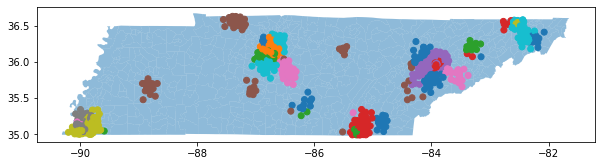

In [12]:
axis = tn.plot(figsize = (10,10), alpha=0.5)
tnroof.plot(ax=axis, column='region_name')
plt.show()

In [15]:
tnroof.to_csv('../data/tnroof.csv', index=False)

In [16]:
query2 = """SELECT * FROM `solar-roof-capstone.capdatasets.ACS18_for_roofdata`
    """
query2_job = client.query(query2)
census = query2_job.to_dataframe()

In [17]:
census

,geo_id,do_date,total_pop,households,median_age,median_income,income_per_capita,poverty,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,...,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,mortgaged_housing_units,pop_in_labor_force,not_in_labor_force
0,04013941100,2014-01-01,56.0,13.0,21.0,NaN,7613.0,4.0,13.0,NaN,...,5.0,0.0,0.0,2006.0,NaN,NaN,9.0,9.0,9.0,29.0
1,22071004402,2014-01-01,399.0,121.0,27.1,NaN,4386.0,283.0,162.0,NaN,...,0.0,46.0,0.0,2006.0,NaN,34.1,0.0,0.0,107.0,122.0
2,06111003012,2014-01-01,690.0,154.0,16.7,26568.0,6822.0,480.0,154.0,1093.0,...,50.0,44.0,5.0,2012.0,1093.0,46.0,5.0,5.0,250.0,127.0
3,01055000800,2014-01-01,1211.0,390.0,31.1,25750.0,11892.0,496.0,582.0,675.0,...,0.0,0.0,86.0,1940.0,375.0,45.0,355.0,140.0,388.0,482.0
4,42101019502,2014-01-01,3940.0,1112.0,26.3,23114.0,10669.0,1877.0,1338.0,810.0,...,0.0,0.0,152.0,1940.0,636.0,43.1,566.0,266.0,1106.0,1472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52576,18003980002,2014-01-01,17.0,17.0,77.1,NaN,24824.0,12.0,28.0,NaN,...,0.0,0.0,4.0,1983.0,NaN,NaN,9.0,0.0,0.0,17.0
52577,17113000200,2014-01-01,3907.0,234.0,20.1,8707.0,4647.0,722.0,344.0,1106.0,...,0.0,0.0,0.0,1983.0,992.0,51.0,0.0,0.0,1578.0,2329.0
52578,13215010606,2014-01-01,2366.0,30.0,39.2,NaN,4265.0,7.0,46.0,NaN,...,4.0,0.0,0.0,1983.0,NaN,16.9,4.0,0.0,0.0,2342.0
52579,19103002100,2014-01-01,3928.0,720.0,19.8,16864.0,11683.0,949.0,911.0,1082.0,...,10.0,11.0,23.0,1983.0,989.0,51.0,35.0,22.0,1899.0,2024.0
